<h3>1. Kütüphanelerin Yüklenmesi</h3>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,auc

from tensorflow.keras.utils import to_categorical
import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")
import os


from PIL import Image  # Image modülünü kullanmak için


<hr>

<h3>2. Veri Setini Yükleme</h3>

In [2]:
dataset_dir = r"C:\Users\Alperen\Desktop\numbers"  # Burayı kendi veri setinizin dizin yoluyla değiştirin


<hr>

<h3>3. Veri Ön İşleme</h3>

In [3]:
# Klasörleri listeleyelim ve veri setini hazırlayalım
images = []
labels = []
for folder_name in os.listdir(dataset_dir):
    folder_path = os.path.join(dataset_dir, folder_name)
    if os.path.isdir(folder_path):
        print(f"Klasör: {folder_name}")
        label = int(folder_name.split('Sample')[1])  # Örneğin, 'Sample0' -> 0, 'Sample1' -> 1
        # Klasör içindeki dosyaları listeleyelim
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            # PNG dosyalarını yükleyelim
            if file_name.endswith('.png'):
                images.append(file_path)
                labels.append(label)

Klasör: Sample0
Klasör: Sample1
Klasör: Sample2
Klasör: Sample3
Klasör: Sample4
Klasör: Sample5
Klasör: Sample6
Klasör: Sample7
Klasör: Sample8
Klasör: Sample9


In [4]:
# Veri setini eğitim ve test setlerine ayırdık
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Eğitim ve test setlerinin boyutlarını kontrol edelim
print(f"Eğitim seti boyutu: {len(X_train)} görsel, {len(y_train)} etiket")
print(f"Test seti boyutu: {len(X_test)} görsel, {len(y_test)} etiket")

Eğitim seti boyutu: 8128 görsel, 8128 etiket
Test seti boyutu: 2032 görsel, 2032 etiket


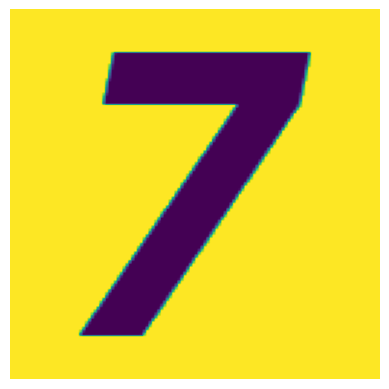

In [5]:
# X_train içindeki ilk örneğin dosya yolunu alalım
image_path = X_train[0]

# Resmi yükleme
img = Image.open(image_path)

# Resmi gösterme
plt.imshow(img)
plt.axis('off')  # Eksenleri kapatma
plt.show()

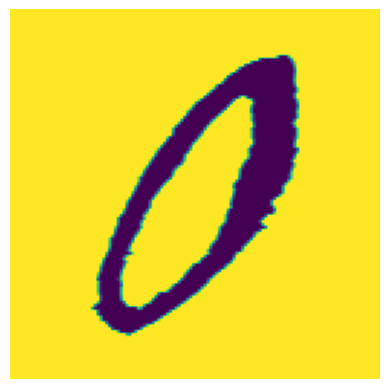

In [6]:
image_path = X_train[3522]

img = Image.open(image_path)

plt.imshow(img)
plt.axis('off') 
plt.show()

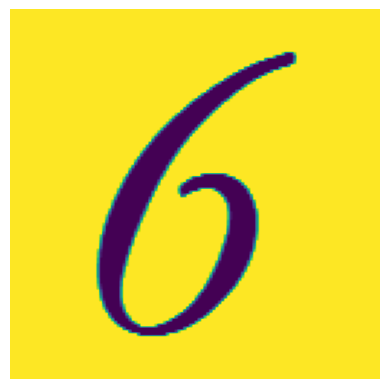

In [7]:
image_path = X_train[152]

img = Image.open(image_path)

plt.imshow(img)
plt.axis('off')
plt.show()

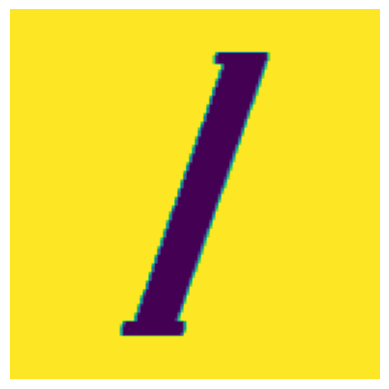

In [8]:
image_path = X_test[61]

img = Image.open(image_path)

plt.imshow(img)
plt.axis('off')
plt.show()

<h5>Normalizasyon</h5>

In [9]:
# Veri kümesindeki görüntüleri Numpy array'ine dönüştürüyoruz
# ve her bir piksel değerini 0' la 1 aralığında ölçeklendirmek
# için normalizasyon yaparız

In [10]:
X_train_normalized = []
for path in X_train:
    img = Image.open(path)
    img_np = np.array(img) / 255.0  # -> Normalizasyon işlemmi
    X_train_normalized.append(img_np)

X_test_normalized = []
for path in X_test:
    img = Image.open(path)
    img_np = np.array(img) / 255.0  # ->Normalizasyon işlemi
    X_test_normalized.append(img_np)

# Numpy array'ine çevirme
X_train_normalized = np.array(X_train_normalized)
X_test_normalized = np.array(X_test_normalized)

<h5>X train'den 30 tane görüntü</h5>

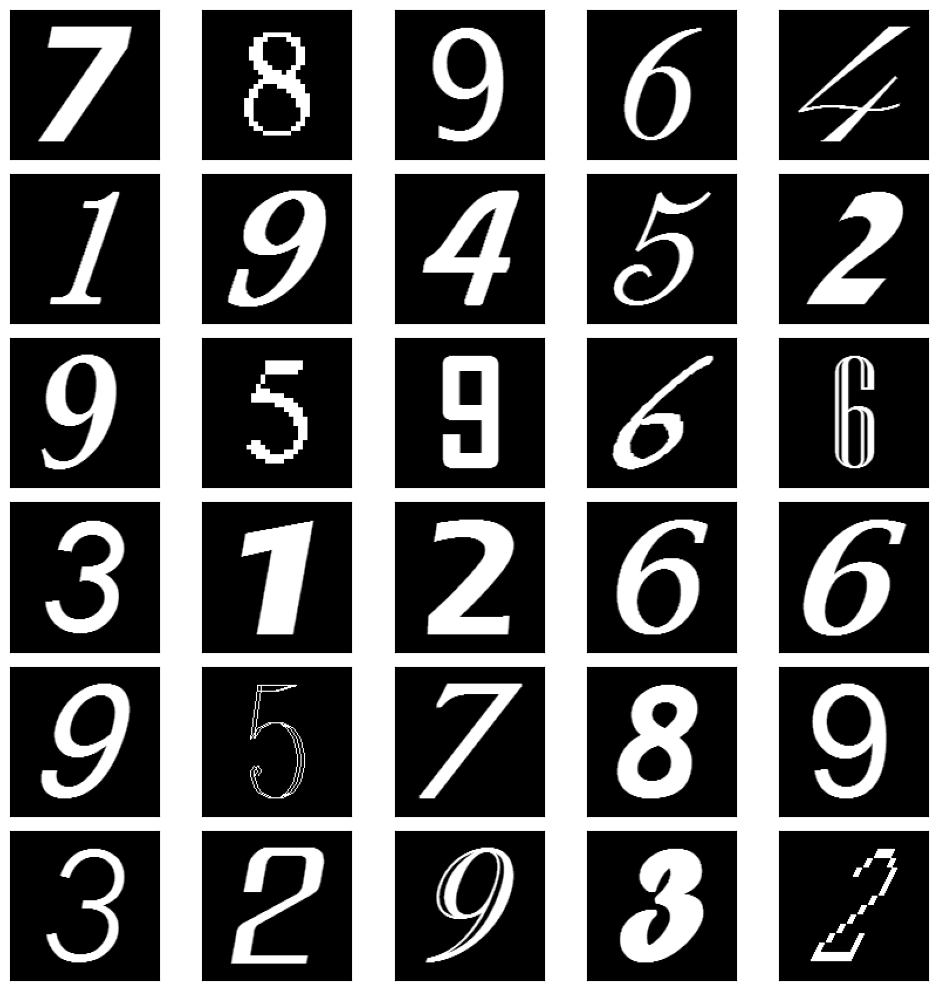

In [11]:
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_normalized[i], cmap=plt.cm.binary) 
plt.tight_layout()
plt.show()

<h5>X test'ten 30 tane görüntü</h5>

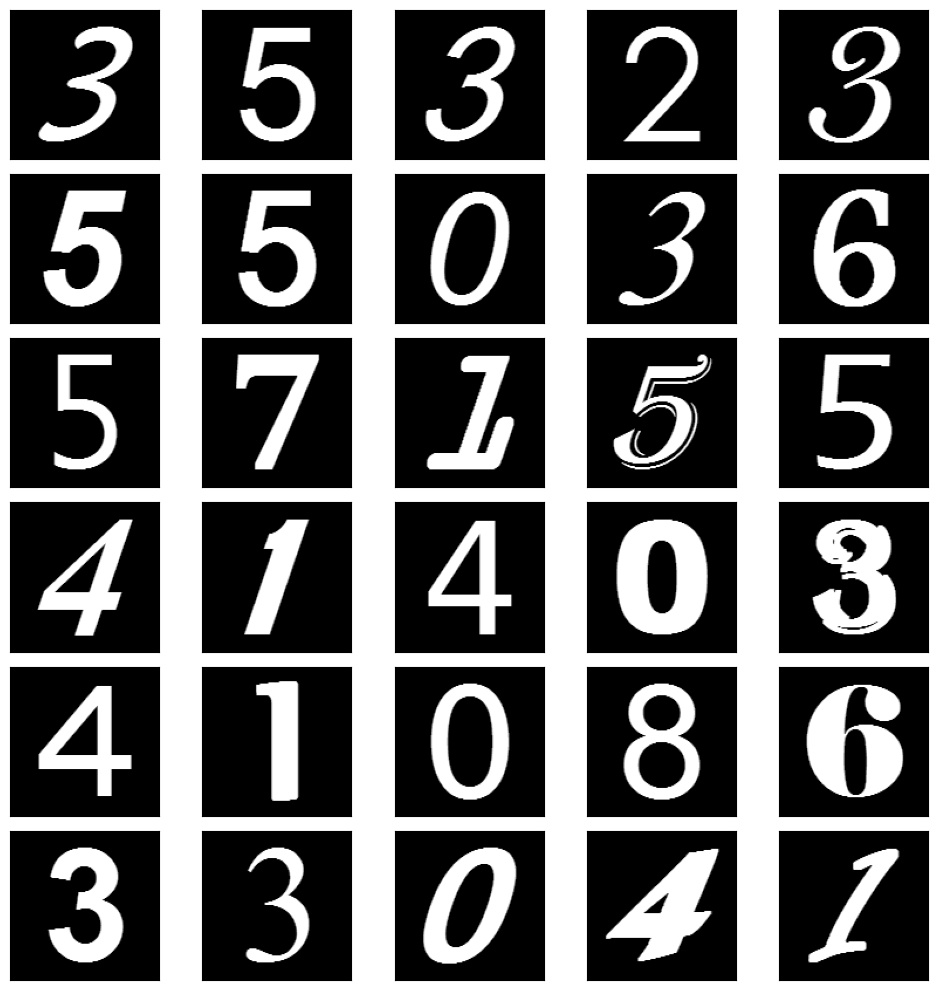

In [12]:
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test_normalized[i], cmap=plt.cm.binary)
plt.tight_layout()
plt.show()

In [13]:
X_train_normalized.shape

(8128, 128, 128)

In [14]:
X_train_normalized.shape[0]

8128

In [15]:
# -1 -> otomatik olarak seç anlamında gelir

X_train_normalized = X_train_normalized.reshape(X_train_normalized.shape[0], -1)
X_test_normalized = X_test_normalized.reshape(X_test_normalized.shape[0], -1)


In [16]:
X_train = X_train_normalized
X_test = X_test_normalized 

<hr>

<h3>4. Model Eğitme</h3>

<h4>KNN Modelini Uygulama</h4>

In [17]:
knn=KNeighborsClassifier().fit(X_train,y_train)
# burda eğitme kısmıı gerçekleştirildi

In [18]:
y_pred=knn.predict(X_test) # X_test'ten tahmin edilecek

def evaluation(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r_squared = r2_score(y_test, y_pred)
    return mae, mse, rmse, r_squared

In [19]:
mae, mse, rmse, r_squared = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

train_score = list()
test_score = list()

train_score.append(knn.score(X_train,y_train))
test_score.append(knn.score(X_test,y_test))

MAE: 0.26427165354330706
MSE: 1.5585629921259843
RMSE: 1.2484242035966717
R2 Score: 0.8129864508007312


In [32]:
#MAE (Ortalama Mutlak Hata):

# ->Modelin tahminlerinin gerçek değerlerden ne kadar uzak olduğunu ölçer.
# ->MAE'nin düşük olması, modelin doğruluğunun yüksek olduğunu ve tahminlerinin genellikle doğru olduğunu gösterir.

# MSE (Ortalama Kare Hatası):

# ->MSE, modelin tahminlerinin gerçek değerlerden ne kadar uzak olduğunu ölçer, ancak hataların karelerini alarak büyük hataların daha fazla vurgulanmasını sağlar.
# ->Daha küçük bir MSE, daha iyi bir model performansını gösterir.

# RMSE (Kare Kök Ortalama Kare Hatası):

# ->RMSE, MSE'nin karekökü alınarak elde edilir.
# ->MSE gibi, RMSE de modelin tahminlerinin gerçek değerlerden ne kadar uzak olduğunu ölçer, ancak orijinal veri birimine dönüştürülür.
# ->Daha küçük bir RMSE, daha iyi bir model performansını gösterir.
# ->RMSE'nin değeri, orijinal veri birimine göre daha yorumlanabilir olduğu için tercih edilir. 

# R2 Score (Determinasyon Katsayısı):

# ->R2 skoru, bağımsız değişkenlerin bağımlı değişkeni ne kadar iyi açıkladığını ölçer.
# ->En iyi değer 1'dir ve daha iyi bir model performansını gösterir. Negatif değerler kötü bir uyumun işaretçisi olabilir.
# ->R2 skoru, modelin ne kadar iyi uyum sağladığını ölçer.


In [20]:
# Karmaşıklık matrisi
cmatris = confusion_matrix(y_test, y_pred)
cmatris

array([[220,   1,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 201,   0,   0,   0,   0,   0,   5,   0,   0],
       [  1,   4, 193,   1,   0,   0,   0,   0,   0,   1],
       [  2,   2,   3, 204,   0,   3,   0,   0,   3,   0],
       [  0,  16,   0,   0, 184,   0,   0,   0,   0,   1],
       [  1,   4,   0,   6,   0, 178,   1,   0,   0,   0],
       [  6,   2,   0,   0,   0,   3, 191,   0,   0,   1],
       [  0,  14,   0,   0,   0,   0,   0, 184,   0,   0],
       [  7,   2,   0,   2,   0,   1,   2,   1, 184,   1],
       [  6,   7,   2,   2,   0,   1,   0,   3,   0, 175]], dtype=int64)

In [21]:
# Karmaşıklık Matrisi ile :
# Sol kısım bizim gerçek verilerimizdir
# Alt kısım ise tahmin edilen verilerdir

# Yorumlayabilmek için :
# 0 olan veriyi 220 kez 0 olarak tahmin edebilmiş
# 3 olan veriyi 2 kez 0 olarak tahmin etmiş
# 7 olan veriyi 14 kez 1 olarak tahmin etmiş

# Burdan bu şekilde inceleme yapabiliriz

# Çok fazla karıştırılan veri varsa bunları düzenleyerek tekrar eğitebiliriz




<h4>Yapay Sinir Ağları</h4>

In [22]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense


X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=0)


# resimleri boyutunu değiştirdik, ve normalize işlemini gerçekleştirdik
def resize_and_normalize(images, new_size=(64, 64)):
    normalized_images = []
    for img in images:
        if isinstance(img, str):  # Eğer img bir dosya yoluysa
            img = Image.open(img)
        else:  # Eğer img bir numpy dizisiyse
            img = Image.fromarray(img)
        img = img.resize(new_size)  # Boyutları küçültme islemi
        img_np = np.array(img) / 255.0  # Normalizasyon islemi
        normalized_images.append(img_np)
    return np.array(normalized_images)

X_train = resize_and_normalize(X_train)
X_test = resize_and_normalize(X_test)

# Verilerin şekillendirilmesi
X_train = X_train.reshape(-1, 64, 64, 1).astype('float32')
X_test = X_test.reshape(-1, 64, 64, 1).astype('float32')

# OHE (One hot encoding) işlemi
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Modelin tanımlanması
model = tf.keras.Sequential([
    Flatten(input_shape=(64, 64, 1)),
    # giriş katmanı yapay sinir ağının anlayacağı formata getirildi

    Dense(units=64, activation='relu', name='layer1'),
    # birinci gizli katman, 64 nöronlu ve relu aktivasyon fonksiyonuna sahip.
    # units=64: Birinci gizli katmandaki 64 nöron, bu katmanın feature sayısıdır.
    # activation='relu': Gizli katmanlarda genellikle relu aktivasyon fonksiyonu kullanılır.
    # gizli katmanlarda kullanılması gereken fonksiyon relu'dur. İnsan beyni gibi çalışır. Bir nöronu
    # söndürme ve ateşleme görevini matematiksel olarak gerçekleştiren bir fonksiyondur.

    Dense(units=10, activation='softmax', name='output_layer')
    # çıktı katmanıdır
    # activation='softmax'
    # çıktıdan beklenilen 10 farklı sonuç var (0'dan 9'a kadar 10 rakam) bu nedenle bu probleme
    # çok sınıflı bir sınıflandırma görevi diyebiliriz. Bu tip yapay sinir ağlarının çıkış katmanında
    # aktivasyon fonksiyonu softmax seçilir. Eğer 2 sınıflı bir görev olsaydı bu katmandaki aktivasyon
    # fonksiyonu sigmoid olurdu.
])



model.compile(loss='categorical_crossentropy',
              # Hata değerlendirme metriği olarak categorical_crossentropy kullanılır.
              # Çok sınıflı bir problem olduğu için categorical_crossentropy yöntemi uygundur.


              optimizer='adam',
              # kayıp fonksiyonunun ne ile optimize edileceğini belirliyoruz. Burada adam algoritmasını kullanıyoruz.

              metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), 'accuracy']
              )


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer1 (Dense)                       │ (None, 64)                  │         262,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 262,858 (1.00 MB)

 Trainable params: 262,858 (1.00 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.fit(X_train, y_train, epochs=5, batch_size=16, validation_data=(X_test, y_test))

# epochs=5 : Modelin eğitim sırasında veri setini kaç kez dolaşacağını belirler
# batch_size=16 : Her epochta eğitim verisinin 16'şar alt kümesi seçilerek ağırlık güncellemeleri yapmak için
# Yani her epochta 16 adet rastgele seçilen gözlem birimine odaklanarak ilgili optimizasyon
# yöntemine dayalı olarak gradyanlar, türevler hesaplanacak ve bir sonraki batch'e geçilecek.
# validation_data=(X_test, y_test) : Modelin her epoch sonunda test verisi üzerinde nasıl performans
# gösterdiğini değerlendirmek için kullanılır.

Epoch 1/5
508/508 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6718 - loss: 1.1083 - precision: 0.8645 - recall: 0.4682 - val_accuracy: 0.8927 - val_loss: 0.3391 - val_precision: 0.9401 - val_recall: 0.8647
Epoch 2/5
508/508 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8888 - loss: 0.3698 - precision: 0.9329 - recall: 0.8646 - val_accuracy: 0.9055 - val_loss: 0.3144 - val_precision: 0.9332 - val_recall: 0.8932
Epoch 3/5
508/508 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9240 - loss: 0.2565 - precision: 0.9479 - recall: 0.9112 - val_accuracy: 0.9449 - val_loss: 0.1801 - val_precision: 0.9639 - val_recall: 0.9326
Epoch 4/5
508/508 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9313 - loss: 0.2182 - precision: 0.9543 - recall: 0.9186 - val_accuracy: 0.9518 - val_loss: 0.1619 - val_precision: 0.9677 - val_recall: 0.9434
Epoch 5/5
508/508 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9440 - loss: 0.1791 - precision: 0.9605 - recall: 0.9342 - val_accuracy: 0.9508 - val_loss: 0.1479 

In [33]:
# İlk epoctaki train accuracy değeri 0.6718, test accuracy değeri 0.8927 çıktı. 
#Her epochta bu fark kapandı ve accuracy değerleri yükseldi. 
#Son epochta train accuracy 0.9440 ve test accuracy 0.9508 oldu. 
#Loss değerleri de düştü.
#Demek ki modelimiz iyiye doğru gitti ve bir noktada doygunluğa ulaştı.
#accuracy değerlerindeki hareketlerin aynısını precision ve recall değerlerinde de gördüğümüz
#için modelimizde güvenilir bir gelişim olduğunu söyleyebiliriz.


In [26]:
history = model.fit(X_train, y_train, epochs=5, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/5
508/508 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9474 - loss: 0.1746 - precision: 0.9582 - recall: 0.9412 - val_accuracy: 0.9567 - val_loss: 0.1414 - val_precision: 0.9698 - val_recall: 0.9478
Epoch 2/5
508/508 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9512 - loss: 0.1461 - precision: 0.9648 - recall: 0.9434 - val_accuracy: 0.9360 - val_loss: 0.2024 - val_precision: 0.9472 - val_recall: 0.9272
Epoch 3/5
508/508 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9573 - loss: 0.1364 - precision: 0.9697 - recall: 0.9522 - val_accuracy: 0.9459 - val_loss: 0.1988 - val_precision: 0.9579 - val_recall: 0.9409
Epoch 4/5
508/508 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9583 - loss: 0.1291 - precision: 0.9697 - recall: 0.9534 - val_accuracy: 0.9547 - val_loss: 0.1555 - val_precision: 0.9669 - val_recall: 0.9473
Epoch 5/5
508/508 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9566 - loss: 0.1269 - precision: 0.9658 - recall: 0.9525 - val_accuracy: 0.9360 - val_loss: 0.2445 

Text(0.5, 1.0, 'Eğitim ve Test Başarım Grafiği')

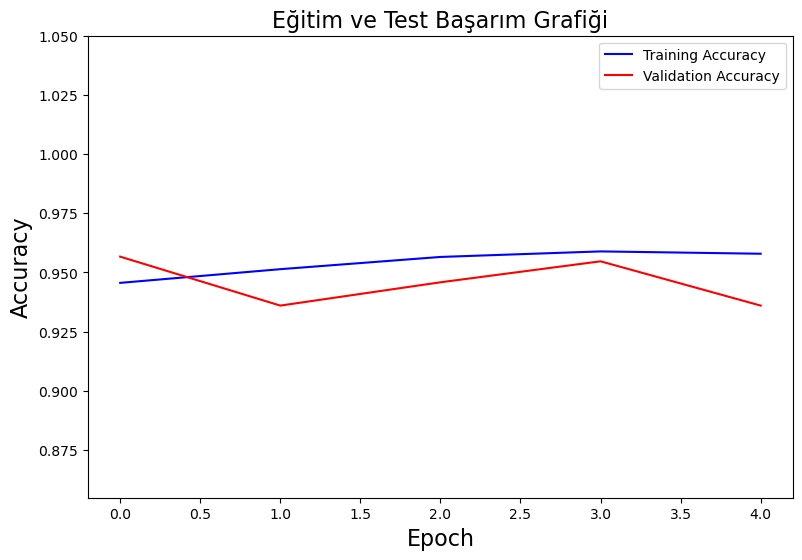

In [27]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], color='b', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='r', label='Validation Accuracy')
plt.legend(loc='upper right')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.ylim([min(plt.ylim())-0.08,1.05])
plt.title('Eğitim ve Test Başarım Grafiği', fontsize=16)


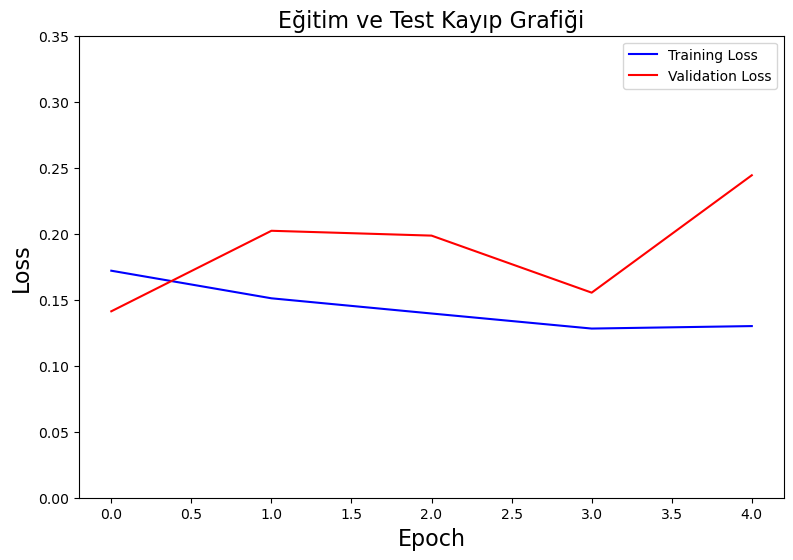

In [28]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.ylim([0, max(plt.ylim())+0.1])
plt.title('Eğitim ve Test Kayıp Grafiği', fontsize=16)
plt.show()

In [29]:
loss, precision, recall, acc = model.evaluate(X_test, y_test, verbose=False) # verbose=False, çıktı üretmemek için

print('\nTest Accuracy: %.1f%%' % (100.0 * acc))
print('\nTest Loss: %.1f%%' % (100.0 * loss))
print('\nTest Precision: %.1f%%' % (100.0 * precision))
print('\nTest Recall: %.1f%%' % (100.0 * recall))


Test Accuracy: 93.6%

Test Loss: 24.5%

Test Precision: 94.5%

Test Recall: 93.0%


In [30]:
#Accuary -> Doğru sınıflandırma oranı
#Precision ->  Örneğin 5 olarak tahmin ettiğimiz sınıfların ne kadarının gerçekten 5 olduğunu ifade eder
#Recall ->  Önce gerçek değerlere odaklanır ve bu modelle bunların kaç tanesini doğru tahmin ettiğimizi ifade eder
#Precision ve Recall birbirine yakın çıktığı için sınıflar arası bir dengesizlik yok denilebilir.